In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#data preprocessing
import pandas as pd
#math operations
import numpy as np

#data scaling
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from sklearn.svm import NuSVR, SVR
#kernel ridge model
from sklearn.kernel_ridge import KernelRidge
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose 


from datetime import timezone
from datetime import datetime

In [2]:
b=pd.read_csv("etherlands_2019_MAT_Report_modified.csv")
a= pd.read_csv("etherlands_2019_MAT_Report_modified.csv")   
c= pd.read_csv("Penetration_Data.csv") 
d=pd.read_csv("6Ps Data.csv")

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d.head()

,Data Source,Freq of Delivery,Region,COUNTRY,Category Group,Category,Market,Sector,Category Gender,Sector/Variance,...,Last 12W-2,Last 12W-1,L12W-1 Significance,Last 12W,L12W Significance,MAT-2,MAT-1,MAT-1 Significance,MAT,MAT Significance
0,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,298.0,263.0,-1.0,58.2,-1.0,26.1,12.0,-1.0,27.0,1.0
1,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,204.6,116.4,-1.0,-160.8,-1.0,87.6,2.7,-1.0,22.8,1.0
2,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,35.4,27.6,-1.0,56.2,1.0,16.8,12.0,-1.0,30.0,1.0
3,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,1.8,1.8,0.0,1.2,0.0,0.0,0.3,0.0,1.5,0.0
4,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Roll-Ons,NaN,Deo Roll-Ons,...,192.8,272.6,1.0,110.8,-1.0,22.8,13.5,-1.0,37.8,1.0


In [25]:
#This is to check all the data types here there are object and float datatypes
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374303 entries, 0 to 374302
Data columns (total 32 columns):
Data Source            374303 non-null object
Freq of Delivery       374303 non-null object
Region                 374303 non-null object
COUNTRY                374303 non-null object
Category Group         370623 non-null object
Category               370601 non-null object
Market                 370623 non-null object
Sector                 374303 non-null object
Category Gender        111448 non-null object
Sector/Variance        372173 non-null object
GMI Level              320216 non-null float64
UL / Comp              374303 non-null object
Global Manufacturer    374303 non-null object
Global Brand           373465 non-null object
Local Brand            374223 non-null object
Measure / KPI          374303 non-null object
Primary Key            374303 non-null object
6P                     374303 non-null object
Source                 374303 non-null object
Supplier      

In [29]:
d.drop(['Last 12W-2','Last 12W-1','L12W-1 Significance','Last 12W','L12W Significance','MAT-2','MAT-1','MAT-1 Significance','MAT','MAT Significance'],axis=1)

,Data Source,Freq of Delivery,Region,COUNTRY,Category Group,Category,Market,Sector,Category Gender,Sector/Variance,...,Global Manufacturer,Global Brand,Local Brand,Measure / KPI,Primary Key,6P,Source,Supplier,Measure Type,Measure Category
0,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,Unilever,Rexona,Rexona,Ad Spend,Unaided Brand Awareness,Promotion,Finance,iFinance,MAT Quarter vs YAG,PROMOTION
1,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,Unilever,Rexona,Rexona,Promo Spend,Unaided Brand Awareness,Promotion,Finance,iFinance,MAT Quarter vs YAG,PROMOTION
2,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,Unilever,Rexona,Rexona Men,Ad Spend,Unaided Brand Awareness,Promotion,Finance,iFinance,MAT Quarter vs YAG,PROMOTION
3,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,NaN,Deo Aerosols,...,Unilever,Rexona,Rexona Men,Promo Spend,Unaided Brand Awareness,Promotion,Finance,iFinance,MAT Quarter vs YAG,PROMOTION
4,BMI,Monthly,Africa,Ghana,BPC,Deodorants & Fragrances,Deodorants,Deo Roll-Ons,NaN,Deo Roll-Ons,...,Unilever,Rexona,Rexona,Ad Spend,Unaided Brand Awareness,Promotion,Finance,iFinance,MAT Quarter vs YAG,PROMOTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374298,NIELSEN PANEL,4 weekly,North America,United States of America,F&R,Tea,Leaf & Instant Tea,Instant Tea,NaN,Instant Tea,...,Unilever,Lipton International,Lipton,Frequency,Retail Sales Value growth,Brand Performance,Consumer Panel,Nielsen,Put People First,NaN
374299,NIELSEN PANEL,4 weekly,North America,United States of America,F&R,Tea,Leaf & Instant Tea,Instant Tea,NaN,Instant Tea,...,Unilever,Lipton International,Lipton,Loyalty,Retail Sales Value growth,Brand Performance,Consumer Panel,Nielsen,Put People First,NaN
374300,NIELSEN PANEL,4 weekly,North America,United States of America,F&R,Tea,Leaf & Instant Tea,Instant Tea,NaN,Instant Tea,...,Unilever,Lipton International,Lipton,Penetration,Retail Sales Value growth,Brand Performance,Consumer Panel,Nielsen,Put People First,NaN
374301,NIELSEN PANEL,4 weekly,North America,United States of America,F&R,Tea,Leaf & Instant Tea,Instant Tea,NaN,Instant Tea,...,Unilever,Lipton International,Lipton,Repeat Rate,Retail Sales Value growth,Brand Performance,Consumer Panel,Nielsen,Put People First,NaN


In [39]:
c.drop(['Value Difference QoQ','Frequency of Delivery','Hierarchy','Prior Period Quarter','Latest Quarter','Demographic','Absolute Value (Two years ago)','Absolute Value (a year ago)'],axis=1)

,Year,Period View,Period,Date,Region,Country,Category Group,Category,Category Segment,Category Detail,...,Measure Type,Measure Category,Measure / KPI,Source,Supplier,Absolute Value,Value Difference,Significance,Quarter - 1,Category Variance
0,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,Put People First,NaN,Penetration,Household Panel,Worldpanel,98.59,-0.24,0,NaN,NaN
1,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,Put People First,NaN,Penetration,Household Panel,Worldpanel,94.78,-1.22,0,NaN,NaN
2,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,Put People First,NaN,Penetration,Household Panel,Worldpanel,51.20,-4.19,0,NaN,NaN
3,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,Put People First,NaN,Penetration,Household Panel,Worldpanel,43.32,-3.64,0,NaN,Hi-suds
4,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,Put People First,NaN,Penetration,Household Panel,Worldpanel,13.44,0.07,1,NaN,Low-suds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184110,2018,Month,Sep,2018-09-01,Africa,South Africa,Beauty & Personal Care,Skin Cleansing,Skin Cleansing,Skin Cleansing Bar,...,Put People First,0.0,Penetration,Consumer Panel,Nielsen,42.50,-0.10,0,0.0,Skin Cleansing Bar
184111,2018,Month,Sep,2018-09-01,Africa,South Africa,Beauty & Personal Care,Skin Cleansing,Skin Cleansing,Skin Cleansing Bar,...,Put People First,0.0,Penetration,Consumer Panel,Nielsen,0.10,0.00,0,0.0,Skin Cleansing Bar
184112,2018,Month,Sep,2018-09-01,Africa,South Africa,Beauty & Personal Care,Skin Cleansing,Skin Cleansing,Skin Cleansing Bar,...,Put People First,0.0,Penetration,Consumer Panel,Nielsen,0.20,-0.70,0,0.0,Skin Cleansing Bar
184113,2018,Month,Sep,2018-09-01,Africa,South Africa,Beauty & Personal Care,Skin Cleansing,Skin Cleansing,Skin Cleansing Bar,...,Put People First,0.0,Penetration,Consumer Panel,Nielsen,34.20,-0.60,0,0.0,Skin Cleansing Bar


In [26]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184115 entries, 0 to 184114
Data columns (total 34 columns):
Year                              184115 non-null int64
Period View                       184115 non-null object
Period                            184115 non-null object
Date                              184115 non-null object
Region                            184115 non-null object
Country                           184115 non-null object
Category Group                    184115 non-null object
Category                          184106 non-null object
Category Segment                  184115 non-null object
Category Detail                   184115 non-null object
UL / Comp                         184115 non-null object
Global Manufacturer               184115 non-null object
Global Brand                      184115 non-null object
Local Brand                       184115 non-null object
BE Tracker                        184053 non-null object
Metric                            1

In [4]:
c.head()

,Year,Period View,Period,Date,Region,Country,Category Group,Category,Category Segment,Category Detail,...,Value Difference,Significance,Quarter - 1,Prior Period Quarter,Latest Quarter,Value Difference QoQ,Frequency of Delivery,Hierarchy,Category Variance,Demographic
0,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,-0.24,0,NaN,NaN,NaN,NaN,Quarterly,NaN,NaN,Total
1,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,-1.22,0,NaN,NaN,NaN,NaN,Quarterly,NaN,NaN,Total
2,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,-4.19,0,NaN,NaN,NaN,NaN,Quarterly,NaN,NaN,Total
3,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,-3.64,0,NaN,NaN,NaN,NaN,Quarterly,NaN,Hi-suds,Total
4,2018,Quarterly,Q3_2018,2018-09-01,Africa,South Africa,HC,Fabric Solutions Category,Fabric Solutions,Fabric Solution Wash,...,0.07,1,NaN,NaN,NaN,NaN,Quarterly,NaN,Low-suds,Total


DataFrame c and d also appear quite similar lets check

In [46]:
#using equals to check values  are same or not but the result is false
c.equals(d)

False

In [49]:
comparison_value = c.values == d.values
print (comparison_value)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False


Python | Pandas dataframe.corrwith()
Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Pandas dataframe.corrwith() is used to compute pairwise correlation between rows or columns of two DataFrame objects. If the shape of two dataframe object is not same then the corresponding correlation value will be a NaN value.

In [52]:
#Hence established that c and d dataframes are not correlated
c.corrwith(d,axis=1).T

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
374298   NaN
374299   NaN
374300   NaN
374301   NaN
374302   NaN
Length: 374303, dtype: float64

In [5]:
c.shape

(184115, 34)

In [6]:
b.head()

,Periods,Market Desc,CATEGORY,MARKET,COMPANY,GLOBAL BRAND,BRAND,SEGMENT,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
0,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,STILL,2522340.78,131480.78,2524970.0,2.170927,2.160901,1.173533,1.169482
1,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,CARBONATED,1711525.73,18725.73,1819580.0,2.239714,2.157051,1.253788,1.241018
2,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,KETCHUP,UNILEVER,CALVE,CALVE,NOT AVAILABLE,98633.20,-15626.80,115190.0,0.986736,0.987399,2.294742,2.295536
3,NaN,NETHERLANDS DISCOUNTER,DRESSINGS,SALAD DRESSINGS,UNILEVER,CALVE,CALVE,NOT AVAILABLE,45398.78,-51.22,45550.0,0.982679,0.988927,2.333030,NaN
4,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,MAYONNAISE,UNILEVER,CALVE,CALVE,NOT AVAILABLE,1340966.51,-43803.49,1387870.0,2.253020,2.200977,3.049267,3.053552


In [7]:
b.shape

(29639, 15)

In [8]:
a.shape

(29639, 15)

In [9]:
a.head()

,Periods,Market Desc,CATEGORY,MARKET,COMPANY,GLOBAL BRAND,BRAND,SEGMENT,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
0,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,STILL,2522340.78,131480.78,2524970.0,2.170927,2.160901,1.173533,1.169482
1,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,BEVERAGES,READY TO DRINK TEA,UNILEVER,LIPTON INTERNATIONAL,LIPTON,CARBONATED,1711525.73,18725.73,1819580.0,2.239714,2.157051,1.253788,1.241018
2,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,KETCHUP,UNILEVER,CALVE,CALVE,NOT AVAILABLE,98633.20,-15626.80,115190.0,0.986736,0.987399,2.294742,2.295536
3,NaN,NETHERLANDS DISCOUNTER,DRESSINGS,SALAD DRESSINGS,UNILEVER,CALVE,CALVE,NOT AVAILABLE,45398.78,-51.22,45550.0,0.982679,0.988927,2.333030,NaN
4,Rolling MAT P2 2019,NETHERLANDS DISCOUNTER,DRESSINGS,MAYONNAISE,UNILEVER,CALVE,CALVE,NOT AVAILABLE,1340966.51,-43803.49,1387870.0,2.253020,2.200977,3.049267,3.053552


 Dataframe a and b are quite similar 

Compare Two Dataframe Values

In the above step we ensure that the shape and type of both the dataframes are equal and now we will compare the values of two dataframes

In [40]:
a.equals(b)

True

In [42]:

comparison_values = a.values == b.values
print (comparison_values)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


Index of the Cell with False value

Get the Index of all the cells where the value is False, Which means the value of the cell differ between the two dataframes.

In [43]:
rows,cols=np.where(comparison_values==False)

Next we will iterate over these cells and update the first dataframe(df1) value to display the changed value in second dataframe(df2)

In [44]:
for item in zip(rows,cols):
    a.iloc[item[0], item[1]] = '{} --> {}'.format(a.iloc[item[0], item[1]],b.iloc[item[0], item[1]])

Export to Excel

Finally we have replaced the old value of dataframe(df1) and entered the new value in the following format:

In [45]:

a.to_excel('./Excel_diff.xlsx',index=False,header=True)

In [10]:
#To check na values
a.isna().sum()

Periods                    2
Market Desc               25
CATEGORY                  21
MARKET                    17
COMPANY                   20
GLOBAL BRAND              26
BRAND                      9
SEGMENT                   16
Base Value               174
Promo Base Value         179
Value Sales              159
Base Price per Unit      262
Price pr Unit           1592
Base Price per L/KG      329
Price pr L/KG          11462
dtype: int64

In [11]:
b.isna().sum()

Periods                    2
Market Desc               25
CATEGORY                  21
MARKET                    17
COMPANY                   20
GLOBAL BRAND              26
BRAND                      9
SEGMENT                   16
Base Value               174
Promo Base Value         179
Value Sales              159
Base Price per Unit      262
Price pr Unit           1592
Base Price per L/KG      329
Price pr L/KG          11462
dtype: int64

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29639 entries, 0 to 29638
Data columns (total 15 columns):
Periods                29637 non-null object
Market Desc            29614 non-null object
CATEGORY               29618 non-null object
MARKET                 29622 non-null object
COMPANY                29619 non-null object
GLOBAL BRAND           29613 non-null object
BRAND                  29630 non-null object
SEGMENT                29623 non-null object
Base Value             29465 non-null float64
Promo Base Value       29460 non-null float64
Value Sales            29480 non-null float64
Base Price per Unit    29377 non-null float64
Price pr Unit          28047 non-null float64
Base Price per L/KG    29310 non-null float64
Price pr L/KG          18177 non-null float64
dtypes: float64(7), object(8)
memory usage: 3.4+ MB


In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29639 entries, 0 to 29638
Data columns (total 15 columns):
Periods                29637 non-null object
Market Desc            29614 non-null object
CATEGORY               29618 non-null object
MARKET                 29622 non-null object
COMPANY                29619 non-null object
GLOBAL BRAND           29613 non-null object
BRAND                  29630 non-null object
SEGMENT                29623 non-null object
Base Value             29465 non-null float64
Promo Base Value       29460 non-null float64
Value Sales            29480 non-null float64
Base Price per Unit    29377 non-null float64
Price pr Unit          28047 non-null float64
Base Price per L/KG    29310 non-null float64
Price pr L/KG          18177 non-null float64
dtypes: float64(7), object(8)
memory usage: 3.4+ MB


Inferential Statistics

Central Tendency measure

In [14]:
a.describe()

,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
count,2.946500e+04,2.946000e+04,2.948000e+04,29377.000000,28047.000000,29310.000000,18177.000000
mean,1.371827e+06,2.831489e+05,2.090657e+06,3.071984,2.757791,38.124927,36.345938
std,5.289201e+06,1.140309e+06,7.752270e+06,3.090127,2.980386,955.978333,479.978107
min,0.000000e+00,-4.501593e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.083917e+04,-4.175000e+00,1.272000e+04,1.691626,1.501033,2.987632,2.951893
50%,9.462221e+04,4.751170e+03,1.248600e+05,2.736540,2.450228,4.300988,4.763316
75%,6.128126e+05,7.663153e+04,8.446350e+05,3.636788,3.307692,7.885211,9.513001
max,8.017829e+07,1.835662e+07,1.144857e+08,54.512087,91.666667,156168.000000,17610.000000


In [15]:
b.describe()

,Base Value,Promo Base Value,Value Sales,Base Price per Unit,Price pr Unit,Base Price per L/KG,Price pr L/KG
count,2.946500e+04,2.946000e+04,2.948000e+04,29377.000000,28047.000000,29310.000000,18177.000000
mean,1.371827e+06,2.831489e+05,2.090657e+06,3.071984,2.757791,38.124927,36.345938
std,5.289201e+06,1.140309e+06,7.752270e+06,3.090127,2.980386,955.978333,479.978107
min,0.000000e+00,-4.501593e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.083917e+04,-4.175000e+00,1.272000e+04,1.691626,1.501033,2.987632,2.951893
50%,9.462221e+04,4.751170e+03,1.248600e+05,2.736540,2.450228,4.300988,4.763316
75%,6.128126e+05,7.663153e+04,8.446350e+05,3.636788,3.307692,7.885211,9.513001
max,8.017829e+07,1.835662e+07,1.144857e+08,54.512087,91.666667,156168.000000,17610.000000


Confidence Interval

In [16]:
c.isna().sum()

Year                                  0
Period View                           0
Period                                0
Date                                  0
Region                                0
Country                               0
Category Group                        0
Category                              9
Category Segment                      0
Category Detail                       0
UL / Comp                             0
Global Manufacturer                   0
Global Brand                          0
Local Brand                           0
BE Tracker                           62
Metric                                0
Measure Type                          0
Measure Category                  84528
Measure / KPI                         0
Source                                0
Supplier                              0
Absolute Value (Two years ago)        0
Absolute Value (a year ago)           0
Absolute Value                        0
Value Difference                      0


In [17]:
c.describe()

,Year,Measure Category,Absolute Value (Two years ago),Absolute Value (a year ago),Absolute Value,Value Difference,Significance,Quarter - 1,Prior Period Quarter,Latest Quarter,Value Difference QoQ,Hierarchy
count,184115.000000,99587.0,184115.000000,184115.000000,184115.000000,184115.000000,184115.000000,99587.000000,99587.000000,99587.000000,99587.000000,99587.000000
mean,2017.803970,0.0,15.256662,23.985074,23.616988,-0.368086,0.376542,4.612297,12.295291,12.340097,-0.243718,1.950455
std,0.396992,0.0,23.982926,26.359513,26.139102,2.263137,0.486656,13.468822,19.574084,19.485347,1.585442,0.234870
min,2017.000000,0.0,0.000000,0.000110,0.000150,-91.800000,-1.000000,0.000000,0.000000,0.000000,-41.600000,0.000000
25%,2018.000000,0.0,0.000000,3.506667,3.400000,-1.200000,0.000000,0.000000,0.500000,0.500000,-0.500000,2.000000
50%,2018.000000,0.0,2.700000,13.025760,12.800000,-0.200000,0.000000,0.000000,3.300000,3.500000,0.000000,2.000000
75%,2018.000000,0.0,21.122985,36.690665,36.300000,0.400000,1.000000,1.000000,14.900000,15.000000,0.200000,2.000000
max,2018.000000,0.0,100.000000,100.000000,100.000000,61.200000,1.000000,100.000000,100.000000,100.000000,12.600000,2.000000


In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374303 entries, 0 to 374302
Data columns (total 32 columns):
Data Source            374303 non-null object
Freq of Delivery       374303 non-null object
Region                 374303 non-null object
COUNTRY                374303 non-null object
Category Group         370623 non-null object
Category               370601 non-null object
Market                 370623 non-null object
Sector                 374303 non-null object
Category Gender        111448 non-null object
Sector/Variance        372173 non-null object
GMI Level              320216 non-null float64
UL / Comp              374303 non-null object
Global Manufacturer    374303 non-null object
Global Brand           373465 non-null object
Local Brand            374223 non-null object
Measure / KPI          374303 non-null object
Primary Key            374303 non-null object
6P                     374303 non-null object
Source                 374303 non-null object
Supplier      

In [19]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184115 entries, 0 to 184114
Data columns (total 34 columns):
Year                              184115 non-null int64
Period View                       184115 non-null object
Period                            184115 non-null object
Date                              184115 non-null object
Region                            184115 non-null object
Country                           184115 non-null object
Category Group                    184115 non-null object
Category                          184106 non-null object
Category Segment                  184115 non-null object
Category Detail                   184115 non-null object
UL / Comp                         184115 non-null object
Global Manufacturer               184115 non-null object
Global Brand                      184115 non-null object
Local Brand                       184115 non-null object
BE Tracker                        184053 non-null object
Metric                            1

In [1]:
from IPython.core.display import Image
Image(url= "https://www.simplypsychology.org/confidence-interval.jpg?ezimgfmt=rs:553x332/rscb13/ng:webp/ngcb13", width=500, height=500)


In [2]:
from IPython.core.display import Image
Image(url= "https://cdn.smassets.net/assets/cms/cc/uploads/mp-marginoferror-formula.png", width=500, height=500)

In [22]:
import scipy.stats as stats

In [23]:
z_critical=stats.norm.ppf(q=0.975)

In [24]:
margin_of_error=z_critical*(np.std(estimates)/np.sqrt(200))

NameError: name 'estimates' is not defined

Visualization

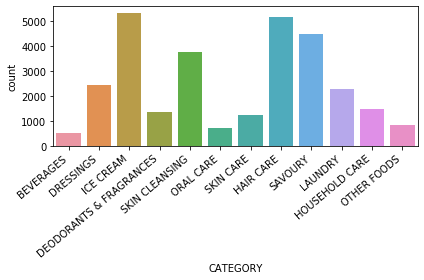

In [31]:
#Basic sanity checking
ax=sns.countplot(a['CATEGORY'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

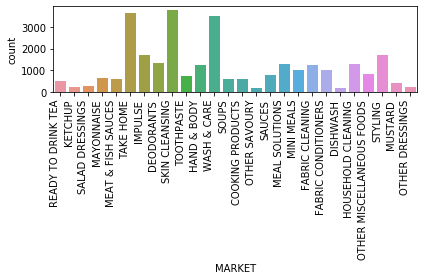

In [32]:
bx=sns.countplot(a['MARKET'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


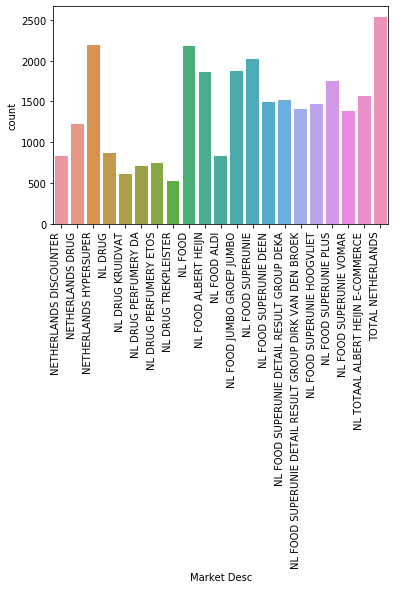

In [33]:
bx=sns.countplot(a['Market Desc'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

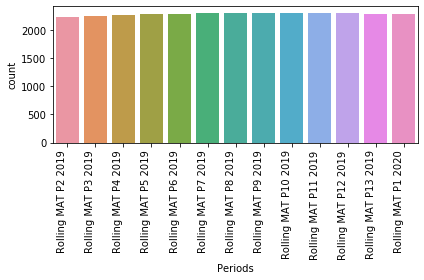

In [34]:
bx=sns.countplot(a['Periods'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
#bx.set_yticklabels(bx.get_yticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

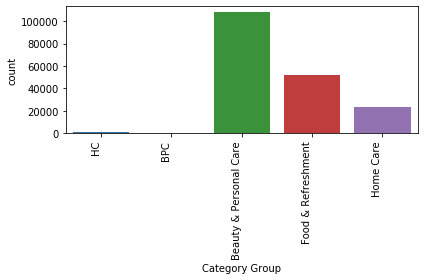

In [35]:
bx=sns.countplot(c['Category Group'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

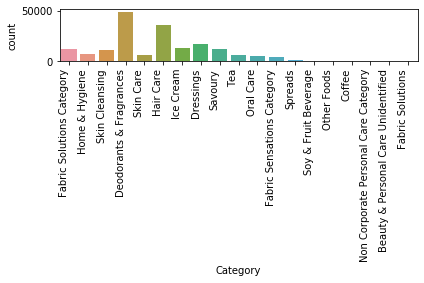

In [36]:
bx=sns.countplot(c['Category'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

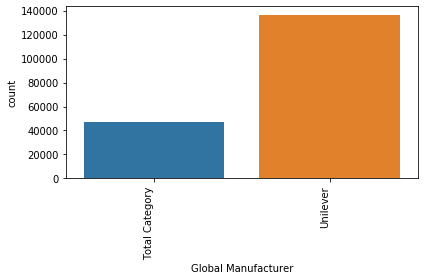

In [37]:
bx=sns.countplot(c['Global Manufacturer'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

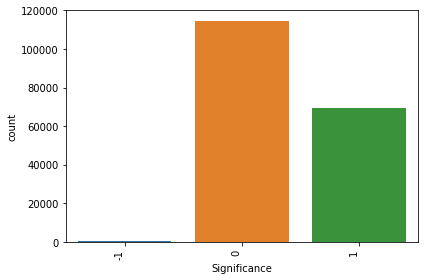

In [38]:
bx=sns.countplot(c['Significance'])

bx.set_xticklabels(bx.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()